#  Initial Acne Dataset Exploration

The purpose of the notebook is to explore the external dataset.

Please

In [ ]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(str(Path.cwd().parent))

import multiprocessing
import os
from loguru import logger
from src.utils.gcs_utils import set_environement_variable

is_env_variables_set = set_environement_variable()
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'path to auth.json file'

from src.utils import envs 
e=envs.Envs()

import src.utils.config_manager as config_manager
is_config_download = config_manager.download_config_from_gcs()
config=config_manager.init()
from src.data.make_dataset import read_images_from_db
from src.utils.utils import logger_config
from src.utils.gcs_utils import image_reader
logger.configure(**logger_config())
load_models = e.load_models
multiprocessing.set_start_method('spawn', force=True)

Using Default Env Variable:GCS
Using Default Env Variable:LOAD_MODELS
Using Default Env Variable:GCS_IMAGE_BUCKET
Using Default Env Variable:USER_DERMINATOR
Using Default Env Variable:PW_DERMINATOR
Using config file from environment variable GCS


# 1. Initial Exploration

In [9]:
config.set('class_list', ['acne_comedos','acne_mixed','acne_cystic','acne_excoriated', 'acne_scars'])

In [10]:
images,labels= read_images_from_db(resized=True)

In [11]:
widths, heights=[],[]
labels = []
for image in images:
      height, width = image_reader(image, os.environ["GCS_IMAGE_BUCKET"]).shape[:2]
      widths.append(width)
      heights.append(height)
      labels.append(Path(image).parent.name)

In [12]:
df = pd.DataFrame(list(zip(images, labels, widths, heights)), columns =['image_path', 'label', 'width', 'height'])
df.head(10)

image_path               label  \
0  sdd_files/data/data_2_13class/Acne-Closed-Come...  Acne-Closed-Comedo   
1  sdd_files/data/data_2_13class/Acne-Closed-Come...  Acne-Closed-Comedo   
2  sdd_files/data/data_2_13class/Acne-Closed-Come...  Acne-Closed-Comedo   
3  sdd_files/data/data_2_13class/Acne-Closed-Come...  Acne-Closed-Comedo   
4  sdd_files/data/data_2_13class/Acne-Closed-Come...  Acne-Closed-Comedo   
5  sdd_files/data/data_2_13class/Acne-Closed-Come...  Acne-Closed-Comedo   
6  sdd_files/data/data_2_13class/Acne-Closed-Come...  Acne-Closed-Comedo   
7  sdd_files/data/data_2_13class/Acne-Closed-Come...  Acne-Closed-Comedo   
8  sdd_files/data/data_2_13class/Acne-Closed-Come...  Acne-Closed-Comedo   
9  sdd_files/data/data_2_13class/Acne-Closed-Come...  Acne-Closed-Comedo   

   width  height  
0    224     224  
1    224     224  
2    224     224  
3    224     224  
4    224     224  
5    224     224  
6    224     224  
7    224     224  
8    224     224  
9    224     224

In [13]:
df['label'].value_counts()

acne-cystic           115
Acne-Open-Comedo       68
acne-pustular          62
Acne-Closed-Comedo     37
Name: label, dtype: int64

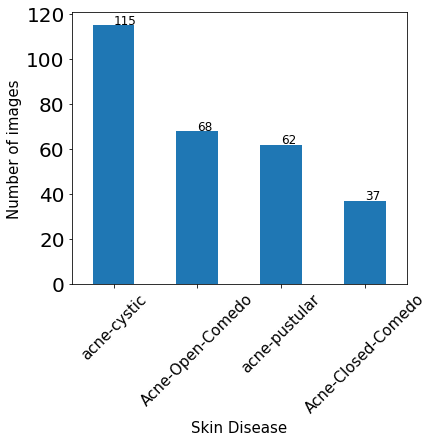

In [16]:
plt.figure(figsize=(6,5))
df['label'].value_counts().plot(kind='bar', rot=45)
plt.xlabel('Skin Disease', fontsize=15)
plt.ylabel('Number of images', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
for index, data in enumerate(df['label'].value_counts()):
  plt.text(x=index, y=data+0.5, s=f'{data}', fontdict=dict(fontsize=12))
plt.show()

# 2. Removing the background 

In [45]:
from src.data.skin_functions import masknonskin_original
import cv2

Image Before

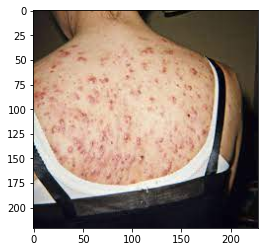

In [60]:
img = cv2.imread('model-acne.jpeg')
img_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_original)

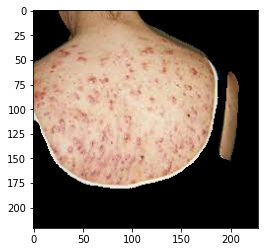

In [61]:
img = cv2.imread('model-acne.jpeg') 
img = masknonskin_original(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# 3. Visualize Samples

In [19]:
def visualize_samples(label, num_col = 8, num_row = 2):
  f, ax = plt.subplots(num_row, num_col, figsize=(30,10))
  f.suptitle(f"{label} samples", fontsize=20)
  image_paths_label = df[df['label']==label]['image_path'].values
  count =0
  for i in range(0,num_row):
    for j in range(0,num_col):
      img = image_reader(image_paths_label[count], os.environ["GCS_IMAGE_BUCKET"])
      ax[i,j].imshow(img)
      ax[i,j].axis('off')
      count+=1

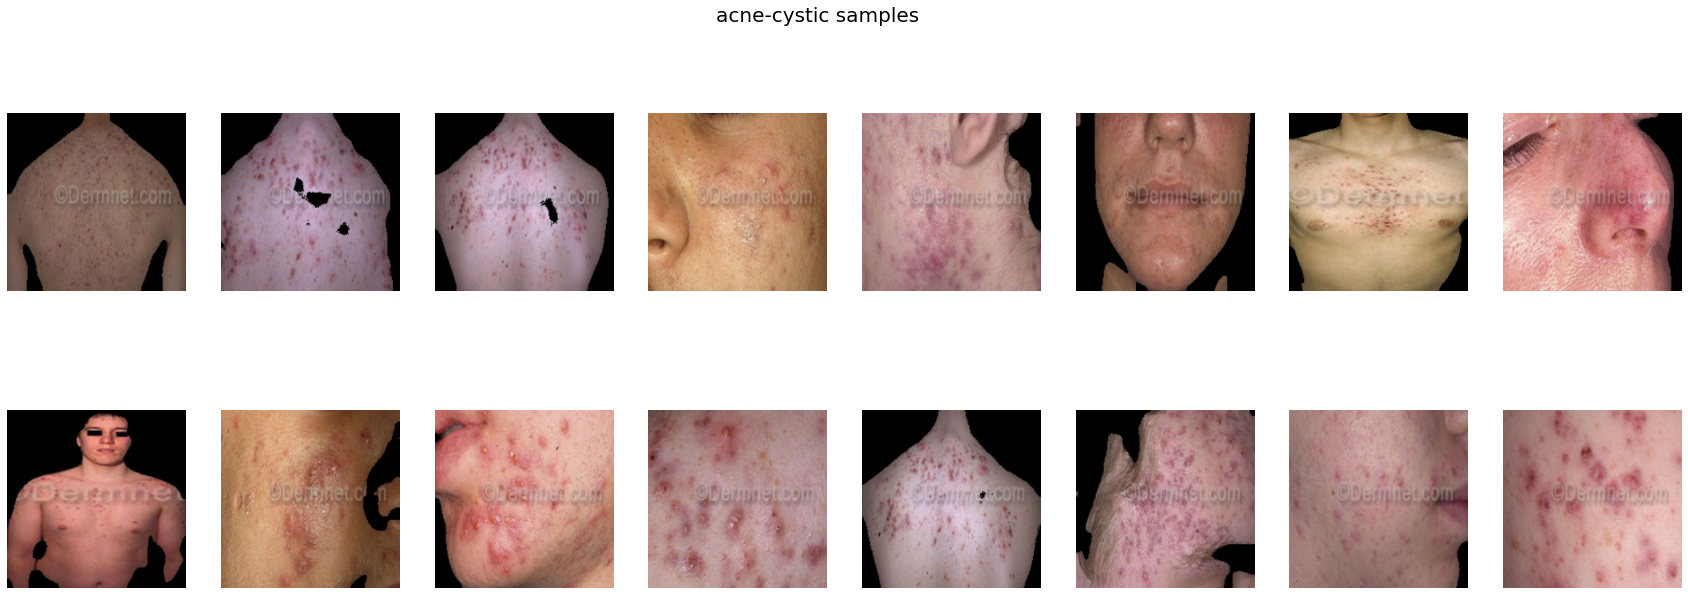

In [20]:
visualize_samples('acne-cystic')

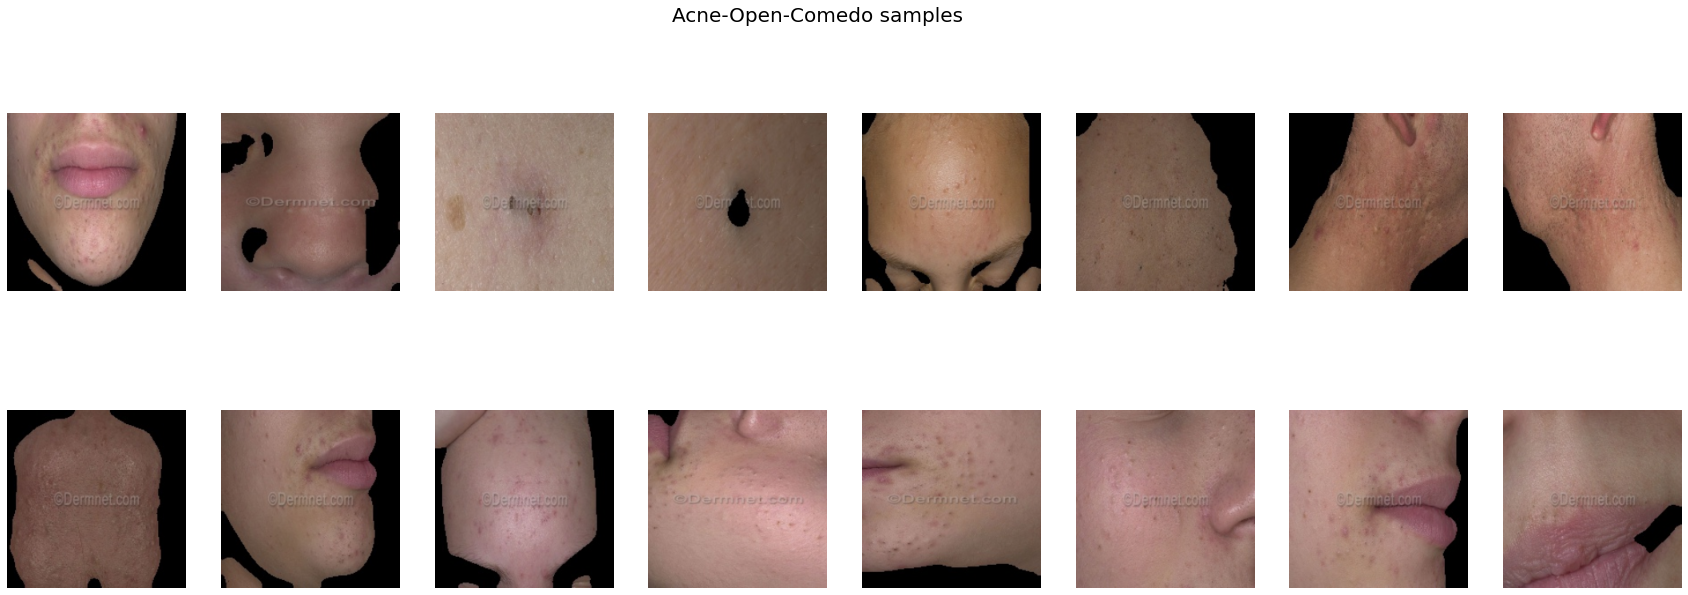

In [27]:
visualize_samples('Acne-Open-Comedo')

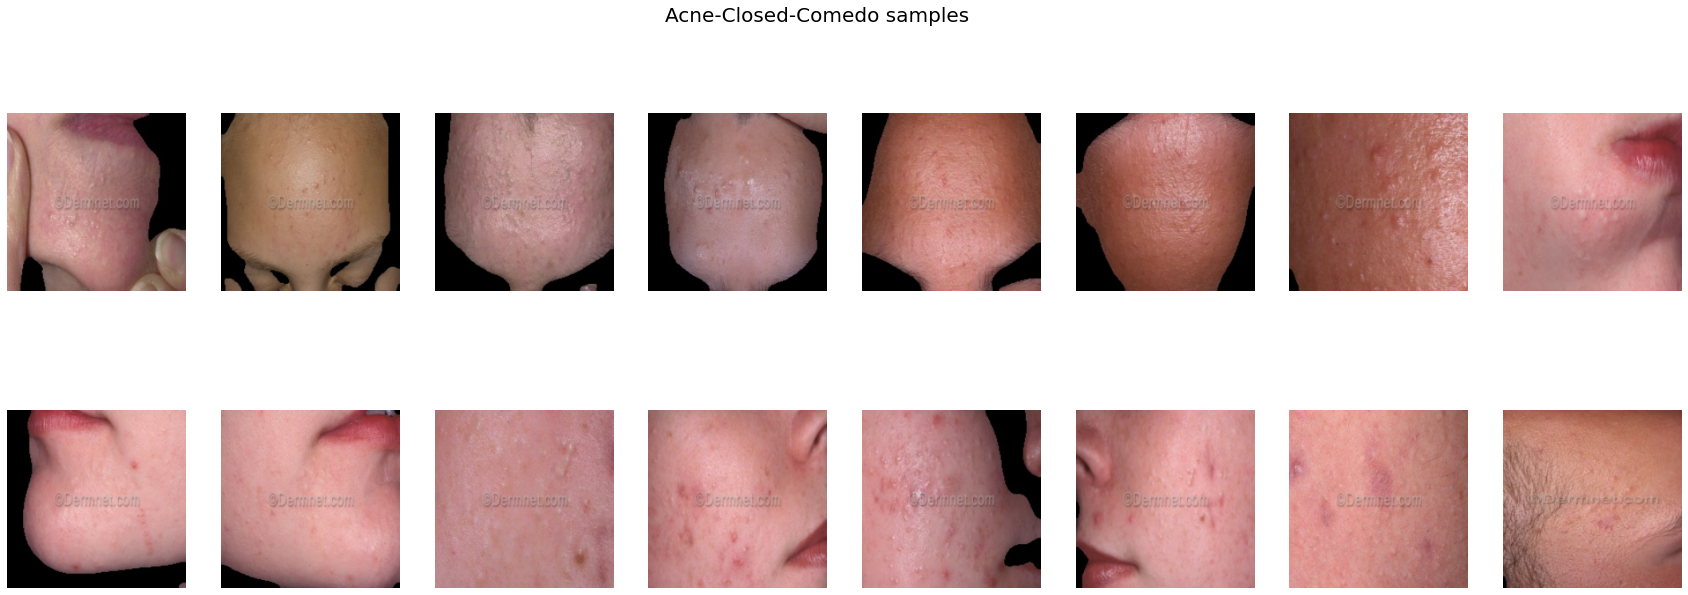

In [21]:
visualize_samples('Acne-Closed-Comedo')

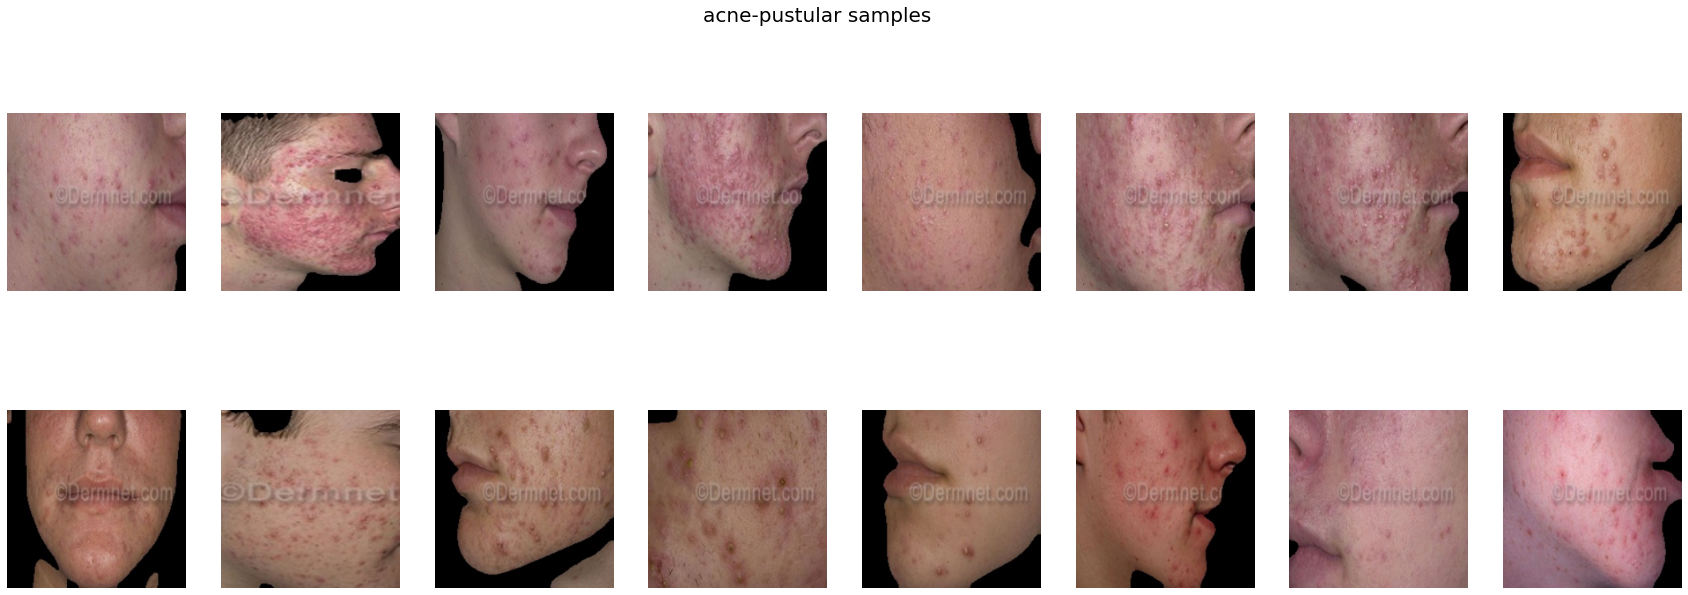

In [26]:
visualize_samples('acne-pustular')